In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Problem Statement:Customers Segmentation

The dataset contains data of different customers showing them as defualters or not. Nowadays, 
bankruptcy and fraudalent have inecreased day-by-day.Therefore this data can be used by banks
or financial institution to identify whether a customer is defaulter or not, will save time and will 
improve the performance of our financial sector

# Exploratory Data Analysis

Now that we have an overview of the business case and a formal problem statement, 
the very next stage is to explore and understand the data. 
This is also called the Exploratory Data Analysis (EDA) step.
In this section, we will load the data into our analysis environment and explore its properties. 
It is worth mentioning again that EDA is one of the most important phases in the
whole workflow and can help with not just understanding the dataset, but also in presenting 
certain fine points that can be useful in the coming steps.



# Preprocessing

The EDA process begins with loading the data into the environment, 
getting a quick look at it along with count of records and number of attributes. 
We will be making heavy use of pandas and numpy to perform data manipulation and related tasks.
For visualization purposes, we will use matplotlib and seaborn
along with pandas' visualization capabilities wherever possible

In [2]:
data=pd.read_csv(r"C:\Users\kalim khan\Downloads\cust_segmentation_Data.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
data.shape # there are 850 rows and 9 columns in this data

(850, 9)

In [4]:
## now there is no usage of customer id column we can drop that column 
data.drop(['Customer Id'],axis=1,inplace=True)

In [5]:
data.shape #see i have dropped the colums of customer id before shape was (850,9)& after dropping its(850,8)

(850, 8)

In [6]:
data.info() ## see in data set there is a null values in defaulted columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [8]:
data.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

NOW I WILL TREAT FOR NULL VALUES 

In [15]:
def defaulter(cols):
    Defaulted=cols[0]
    Years_Employed=cols[1]
    Card_Debt=cols[2]
    Other_Debt=cols[3]
    DebtIncomeRatio=cols[4]
    
    if pd.isnull(Defaulted):
        if Years_Employed<6 or Card_Debt>1.5 or Other_Debt>3 or DebtIncomeRatio>10:
            return 1
        else:
            return 0
    else:
        Defaulted

In [18]:
data['Defaulted'].fillna(value=data[['Defaulted','Years Employed','Card Debt','Other Debt','DebtIncomeRatio']].apply(defaulter,axis=1),inplace=True)


In [20]:
data.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# NOW DATA VISUALIZATION 

In [26]:
data.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

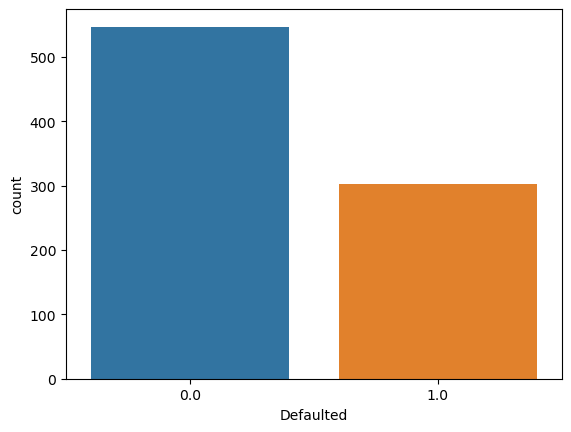

In [25]:
sns.countplot(x='Defaulted',data=data)
plt.show()

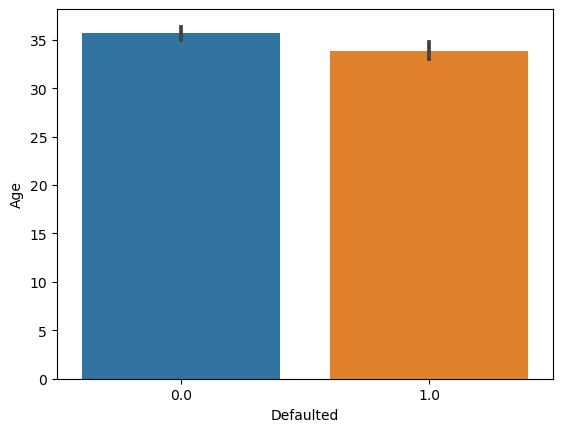

In [29]:
sns.barplot(x='Defaulted',y='Age',data=data)
plt.show()

<Axes: xlabel='Defaulted', ylabel='Years Employed'>

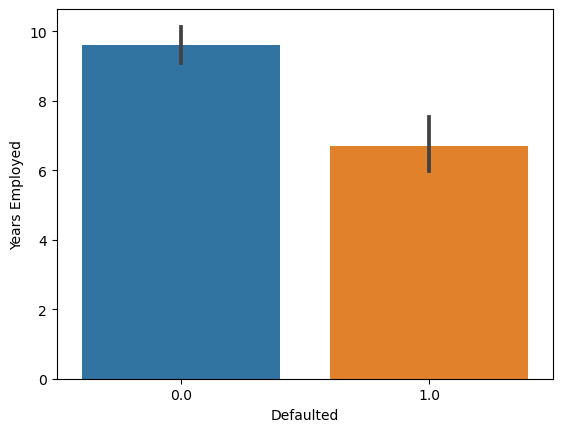

In [30]:
sns.barplot(x='Defaulted',y='Years Employed',data=data)

<Axes: xlabel='Defaulted', ylabel='Income'>

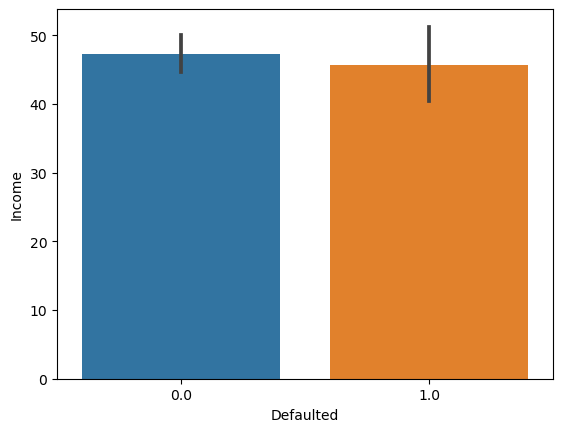

In [31]:
sns.barplot(x='Defaulted',y='Income',data=data)

<Axes: xlabel='Defaulted', ylabel='Card Debt'>

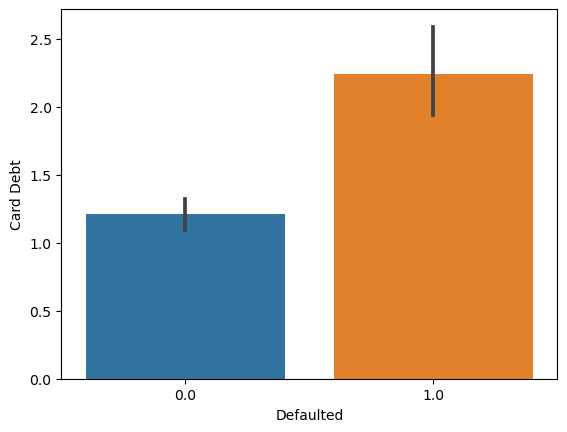

In [32]:
sns.barplot(x='Defaulted',y='Card Debt',data=data)

<Axes: xlabel='Defaulted', ylabel='Other Debt'>

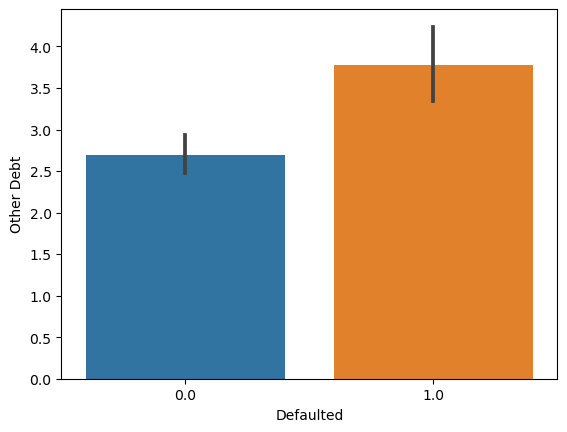

In [34]:
sns.barplot(x='Defaulted',y='Other Debt',data=data)

<Axes: xlabel='Defaulted', ylabel='DebtIncomeRatio'>

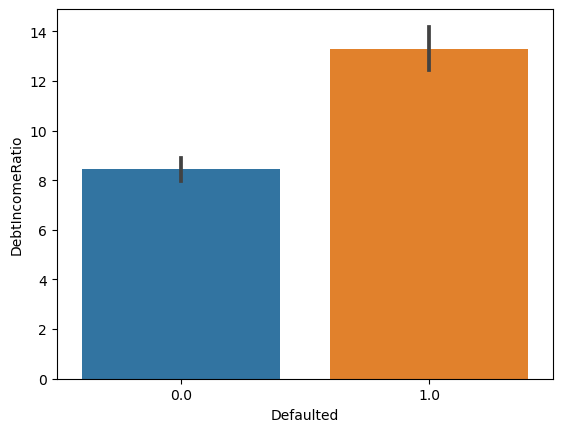

In [35]:
sns.barplot(x='Defaulted',y='DebtIncomeRatio',data=data)

In [37]:
data.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.356471,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.479238,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [38]:
data.corr()  ## now i will check the corelation by using heat map i will visualize 

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.105724,0.008240
Edu,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.070708,0.008053
Years Employed,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.206133,-0.033625
Income,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.018404,-0.035585
Card Debt,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.232244,0.514971
Other Debt,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.152277,0.572545
Defaulted,-0.105724,0.070708,-0.206133,-0.018404,0.232244,0.152277,1.000000,0.345210
DebtIncomeRatio,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.345210,1.000000


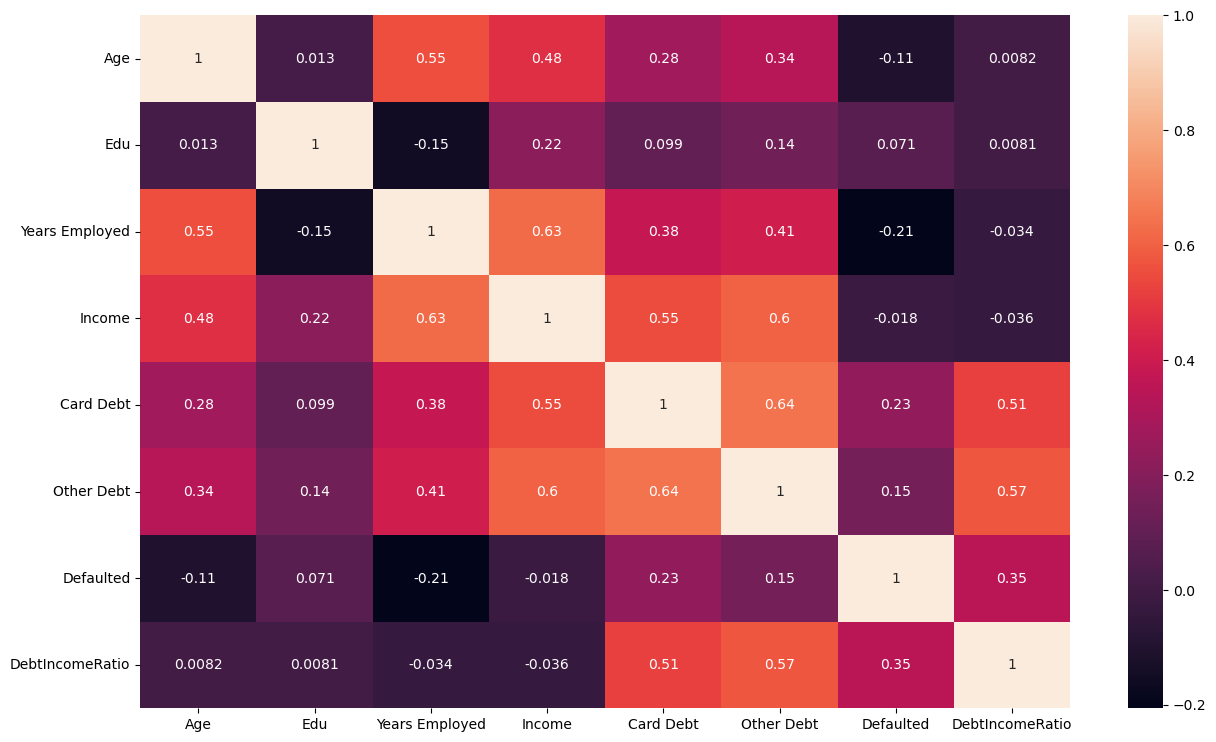

In [46]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

1)In the given data the defaulters are less in number.

2)Age does not affect the defaulters.

3)Years of employment affect the defaulter in inverse proportion,if years of
employment is less then there is more chance of being a defaulter.

4)Income also does not show great variation to defaulters.

5)If Card Debt is more then there is more possibility of being a defaulter.

6)If Other Debt is more then also there is more possibility of being a defaulter.

7)If Debt to Income ratio is more then there is more probabilty that customer could be defaulter.

8)Also the heatmap shows that Card Debt, Other Debt and Debt Income Ratio are highly correlated to Defaulter.
It means that the if Card Debt,Other Debt and Debt Income Ratio are more then 
there is more probability the customer could be a defaulter,whereas income of customer does not affect of
customer being a defaulter.

# WE WILL BUILD MODEL USING MACHINE LEARNING ALGORITHM

## we can assign the target feature,independent feature and dependent feature

In [48]:
X=data.iloc[:,[0,1,2,3,4,5,7]].values
y=data.iloc[:,[6]].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# STANDARDSCALER TECHNIQUE

In [51]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# using Logistic Regression

In [57]:
## importing the module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [62]:
lg=LogisticRegression()
lg=lg.fit(X_train,y_train)


In [65]:
y_predict=lg.predict(X_test)

In [67]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

RMSE 0.5395181296365978


In [68]:
print("Accuracy=",metrics.accuracy_score(y_test,y_predict))

Accuracy= 0.7089201877934272
